# Data Understanding

In [23]:
import pandas as pd
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\student_performance.csv",encoding="utf-8")
print("Shape of dataset:",df.shape)
print("Columns:\n", df.columns)


Shape of dataset: (20, 7)
Columns:
 Index(['Hours_Studied', 'Previous_Scores', 'Extracurricular', 'Sleep_Hours',
       'Internet_Access', 'Attendance', 'Performance'],
      dtype='object')


In [2]:
df.head()

,Hours_Studied,Previous_Scores,Extracurricular,Sleep_Hours,Internet_Access,Attendance,Performance
0,2,40,No,6,Yes,70,Low
1,5,60,Yes,7,Yes,80,Medium
2,8,85,No,8,Yes,90,High
3,1,35,No,5,No,60,Low
4,6,75,Yes,7,Yes,85,High


In [3]:
print("Missing values:")
print(df.isnull().sum())
print("\n Number of duplicate rows:", df.duplicated().sum())

Missing values:
Hours_Studied      0
Previous_Scores    0
Extracurricular    0
Sleep_Hours        0
Internet_Access    0
Attendance         0
Performance        0
dtype: int64

 Number of duplicate rows: 0


In [4]:
df.describe()

,Hours_Studied,Previous_Scores,Sleep_Hours,Attendance
count,20.000000,20.000000,20.000000,20.000000
mean,4.600000,60.650000,6.500000,78.950000
std,2.414866,18.345443,1.051315,11.874231
min,1.000000,30.000000,5.000000,55.000000
25%,2.750000,46.500000,6.000000,70.000000
50%,4.500000,59.000000,6.500000,80.000000
75%,6.250000,75.750000,7.000000,88.500000
max,9.000000,92.000000,8.000000,96.000000


In [5]:
df.dtypes

Hours_Studied       int64
Previous_Scores     int64
Extracurricular    object
Sleep_Hours         int64
Internet_Access    object
Attendance          int64
Performance        object
dtype: object

# Data Preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
lab = LabelEncoder()

for col in categorical_cols:
    df[col] = lab.fit_transform(df[col])

In [8]:
df.dtypes

Hours_Studied      int64
Previous_Scores    int64
Extracurricular    int64
Sleep_Hours        int64
Internet_Access    int64
Attendance         int64
Performance        int64
dtype: object

In [9]:
df.head()

,Hours_Studied,Previous_Scores,Extracurricular,Sleep_Hours,Internet_Access,Attendance,Performance
0,2,40,0,6,1,70,1
1,5,60,1,7,1,80,2
2,8,85,0,8,1,90,0
3,1,35,0,5,0,60,1
4,6,75,1,7,1,85,0


In [15]:
X = df.drop(columns=['Performance'],axis=1)   
y = df['Performance']
X = pd.get_dummies(X, columns=['Extracurricular', 'Internet_Access'], drop_first=True)
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)
X.head()
y.head()

Shape of X (features): (20, 6)
Shape of y (target): (20,)


0    1
1    2
2    0
3    1
4    0
Name: Performance, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building 

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Model Evaluation

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


# Model Tuning

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
max_depth_values = [2, 4, 6, 8]
criterion_values = ['gini', 'entropy']
results = []

for depth in max_depth_values:
    for criterion in criterion_values:
        model = DecisionTreeClassifier(max_depth=depth, criterion=criterion, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append({
            'max_depth': depth,
            'criterion': criterion,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })

results_df = pd.DataFrame(results)
display(results_df)

,max_depth,criterion,accuracy,precision,recall,f1_score
0,2,gini,1.0,1.0,1.0,1.0
1,2,entropy,1.0,1.0,1.0,1.0
2,4,gini,1.0,1.0,1.0,1.0
3,4,entropy,1.0,1.0,1.0,1.0
4,6,gini,1.0,1.0,1.0,1.0
5,6,entropy,1.0,1.0,1.0,1.0
6,8,gini,1.0,1.0,1.0,1.0
7,8,entropy,1.0,1.0,1.0,1.0


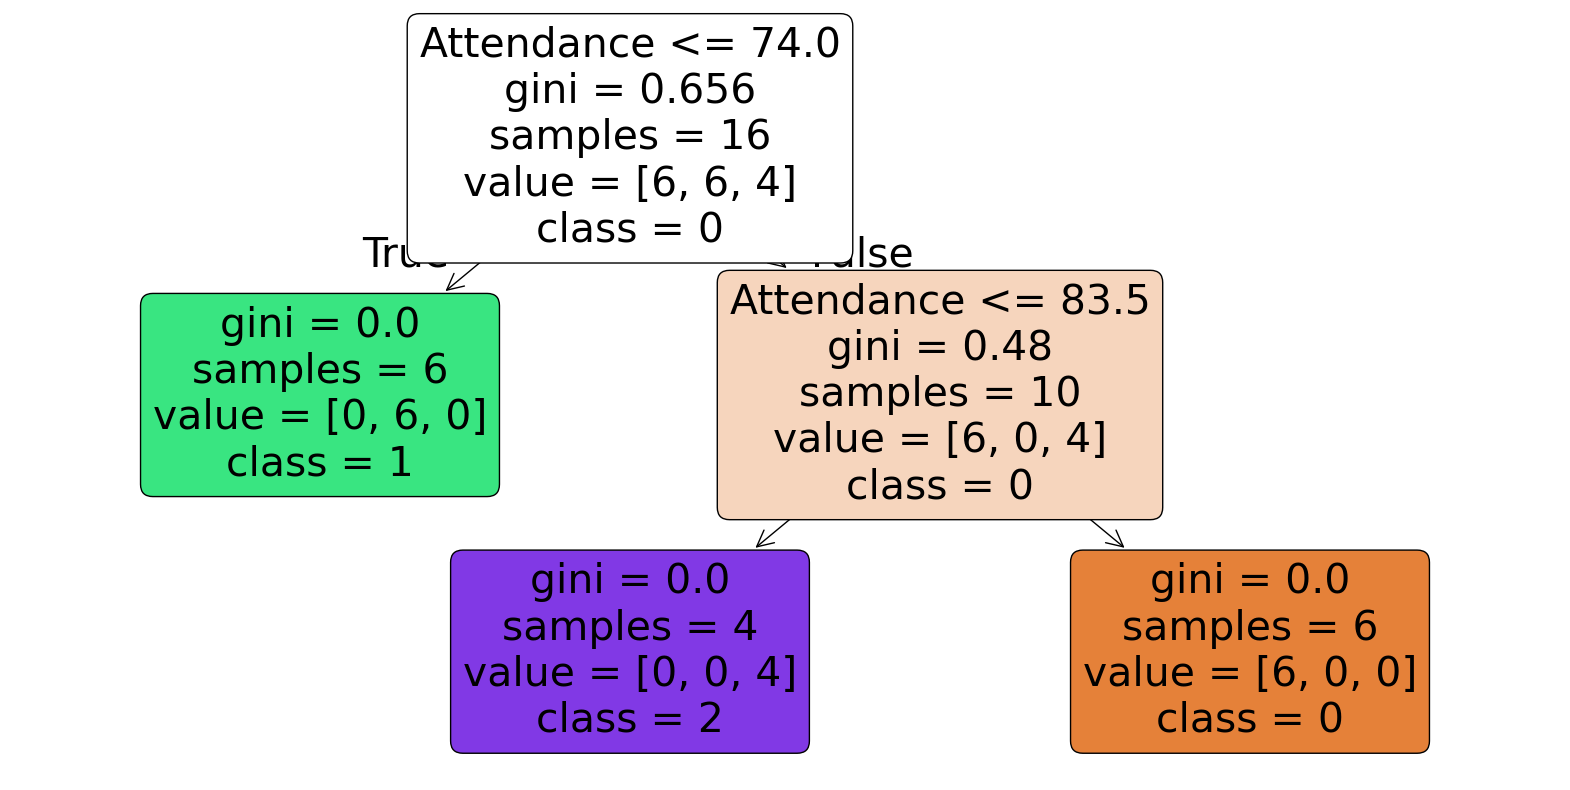

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
model_viz = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=42)
model_viz.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(model_viz, feature_names=X.columns, class_names=[str(name) for name in model_viz.classes_], filled=True, rounded=True)
plt.show()

# Insights & Conclusion

In [22]:
import pandas as pd
feature_importances = model_viz.feature_importances_
feature_importances_series = pd.Series(feature_importances, index=X.columns)
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

print("Feature Importances:")
print(sorted_feature_importances)

Feature Importances:
Attendance           1.0
Hours_Studied        0.0
Previous_Scores      0.0
Sleep_Hours          0.0
Extracurricular_1    0.0
Internet_Access_1    0.0
dtype: float64
